In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv(r"C:\Users\racha\OneDrive\Desktop\Intern AI ML\UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()  ##Explore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.shape

(5000, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.duplicated().sum()

0

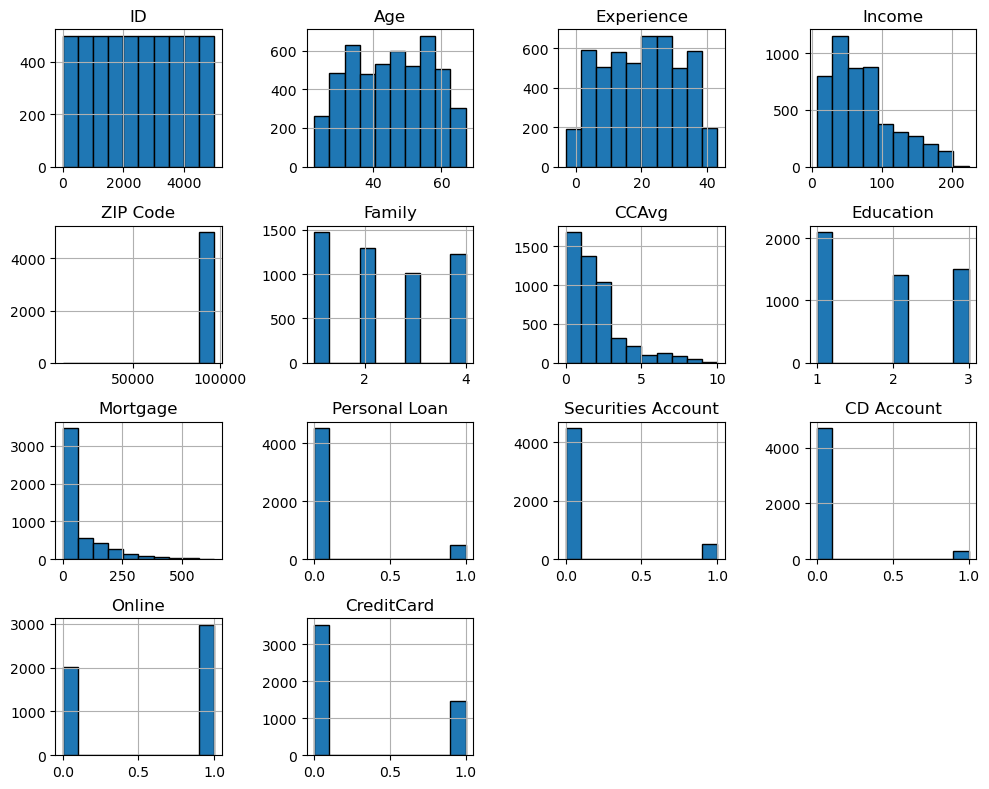

In [8]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8),bins=10,edgecolor='k')
plt.tight_layout()
plt.show()

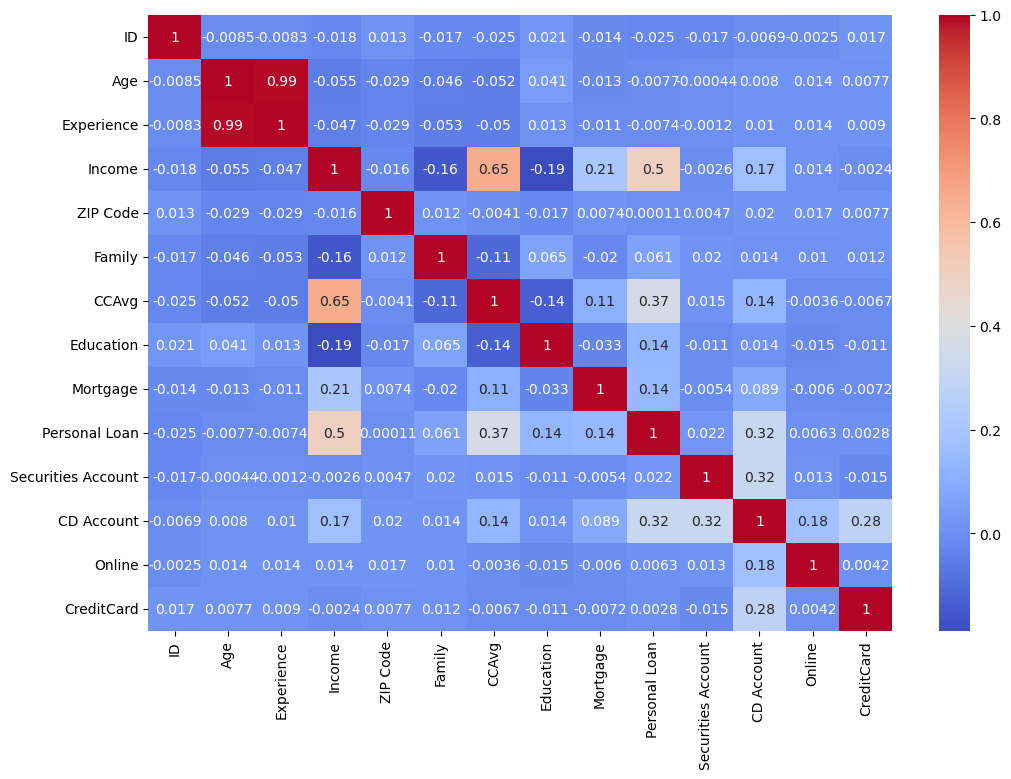

In [9]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [10]:
df['CreditCard'].value_counts()      ## then balanced the data

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [11]:
x=df.drop('CreditCard',axis=1)
y=df['CreditCard']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
## To Balance the data use smooth technique

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline

Pipeline=Pipeline([
    ('oversampling',SMOTE(random_state=42)),
    ('classifier',SVC(kernel='linear',random_state=42)),
])

In [15]:
Pipeline.fit(x_train,y_train)

Pipeline(steps=[('oversampling', SMOTE(random_state=42)),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [16]:
y_pred=Pipeline.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [17]:
from sklearn.metrics import accuracy_score,classification_report
print(f"accuracy= {accuracy_score(y_test,y_pred)}")
print(f"Classfication Report:{classification_report(y_test,y_pred)}")

accuracy= 0.498
Classfication Report:              precision    recall  f1-score   support

           0       0.70      0.52      0.59       708
           1       0.28      0.45      0.34       292

    accuracy                           0.50      1000
   macro avg       0.49      0.48      0.47      1000
weighted avg       0.57      0.50      0.52      1000



**Hyper parameter Tunning**

In [18]:
model=SVC(class_weight='balanced') ##
model.fit(x_train,y_train)

SVC(class_weight='balanced')

In [19]:
from sklearn.model_selection import GridSearchCV
kernel=['linear','poly','rbf','sigmoid']
c=[100,10,1.0,0.1,0.01]

params=dict(kernel=kernel,C=c)

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=5)

In [20]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [21]:
grid.best_params_

{'C': 10, 'kernel': 'sigmoid'}

In [22]:
grid.best_score_

0.7055

In [23]:
y_pred=grid.predict(x_test)
print(f"accuracy= {accuracy_score(y_test,y_pred)}")
print(f"Classfication Report:\n {classification_report(y_test,y_pred)}")

accuracy= 0.517
Classfication Report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60       708
           1       0.31      0.53      0.39       292

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.50      1000
weighted avg       0.60      0.52      0.54      1000

